In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from pathlib import Path


In [27]:
BASE_DIR = Path.cwd()  # Current directory of the running file
CURRENT_DIR = BASE_DIR
DATA_DIR_CENTER = BASE_DIR.parent / "T06_ml_auto_optuna_center"
DATA_DIR_5052 = BASE_DIR.parent / "T07_ml_auto_optuna_5052"
DATA_DIR_6061 = BASE_DIR.parent / "T08_ml_auto_optuna_6061"

In [28]:
res_center = pd.read_excel(DATA_DIR_CENTER / "S03_calculate_performance.xlsx")
res_5052 = pd.read_excel(DATA_DIR_5052 / "S03_calculate_performance.xlsx")
res_6061 = pd.read_excel(DATA_DIR_6061 / "S03_calculate_performance.xlsx")

In [29]:
res_center["optimized_for"] = "center"
res_5052["optimized_for"] = "5052"
res_6061["optimized_for"] = "6061"
res_all = pd.concat([res_center, res_5052, res_6061], ignore_index=True) 
res_all

,random_state,test_size,model,Y,MSE Train (No Val),MSE Test,MAPE Train (No Val),MAPE Test,R2 Train (No Val),R2 Test,optimized_for
0,1,0.3,ElasticNet,Y-1,0.658589,1.031839,1.799166,1.967987,0.341411,0.192828,center
1,1,0.3,ElasticNet,Y-2,0.851388,0.819048,1.314083,4.557089,0.148612,0.001191,center
2,1,0.3,ElasticNet,Y-3,0.592245,0.568977,1.432727,1.401738,0.407755,0.332964,center
3,1,0.3,ElasticNet,Y-All,0.700740,0.806621,1.515325,2.642271,0.299260,0.175661,center
4,2,0.3,ElasticNet,Y-1,0.711169,0.707782,1.649145,1.969197,0.288831,0.188800,center
...,...,...,...,...,...,...,...,...,...,...,...
355,4,0.3,XGBR,Y-All,0.699616,0.755422,1.701801,1.632841,0.300384,0.241743,6061
356,5,0.3,XGBR,Y-1,0.662006,0.965263,22.654064,1.231676,0.337994,0.172299,6061
357,5,0.3,XGBR,Y-2,0.797670,0.814242,1.303369,2.453966,0.202330,-0.063510,6061
358,5,0.3,XGBR,Y-3,0.586357,0.631982,1.137748,0.925167,0.413643,0.335079,6061


In [30]:
matches = {"5052": "Y-1", "6061": "Y-2", "center": "Y-3"}
df_arr = []
for optimized_for, y_name in matches.items():
    filt1 = res_all["optimized_for"] == optimized_for
    filt2 = res_all["Y"] == y_name  
    df_arr.append(res_all.loc[filt1 & filt2])

df_plot = pd.concat(df_arr, ignore_index=True)

(-0.15, 0.6)

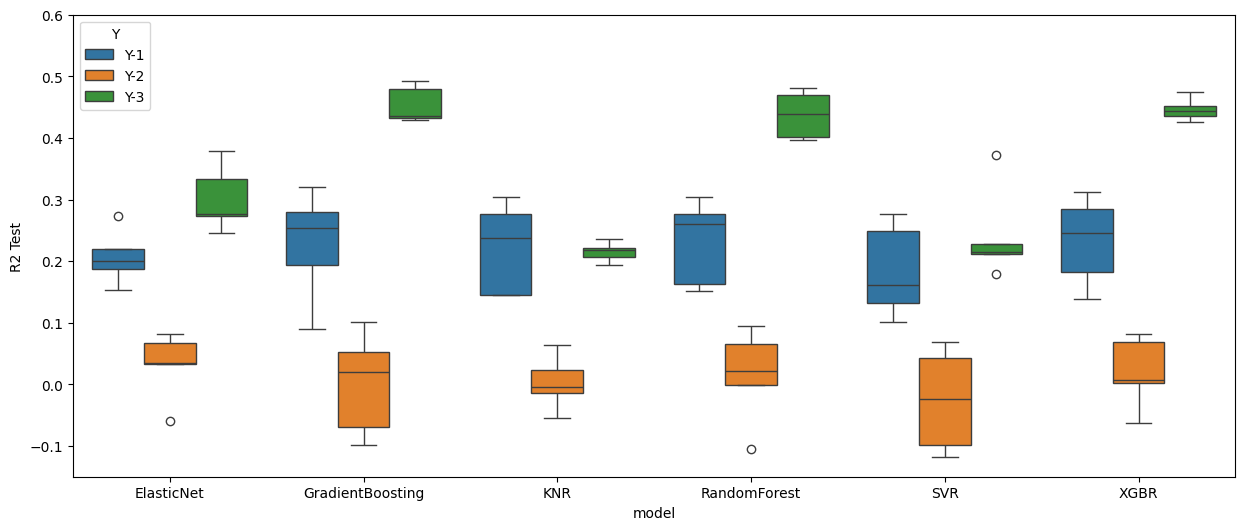

In [31]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(df_plot, x="model", y="R2 Test", hue="Y", ax=ax)
ax.set_ylim(-0.15, 0.6)